# Neural Networks

In [1]:
%pip install torch

   ---------------------------------------- 0.0/198.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.5 MB 1.7 MB/s eta 0:01:54
   ---------------------------------------- 0.2/198.5 MB 2.3 MB/s eta 0:01:26
   ---------------------------------------- 0.4/198.5 MB 2.3 MB/s eta 0:01:27
   ---------------------------------------- 0.6/198.5 MB 2.6 MB/s eta 0:01:17
   ---------------------------------------- 0.7/198.5 MB 2.7 MB/s eta 0:01:13
   ---------------------------------------- 0.9/198.5 MB 2.9 MB/s eta 0:01:09
   ---------------------------------------- 1.1/198.5 MB 2.9 MB/s eta 0:01:08
   ---------------------------------------- 1.3/198.5 MB 3.1 MB/s eta 0:01:03
   ---------------------------------------- 1.5/198.5 MB 3.1 MB/s eta 0:01:04
   ---------------------------------------- 1.6/198.5 MB 3.1 MB/s eta 0:01:04
   ---------------------------------------- 1.8/198.5 MB 3.1 MB/s eta 0:01:04
   ---------------------------------------- 2.1/198.5 MB 3.3 MB/s eta 0


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   -------------------------- ------------- 131.9/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.0/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.2/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.4/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.5/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.7/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 132.9/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 133.0/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 133.2/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 133.3/198.5 MB 3.1 MB/s eta 0:00:22
   -------------------------- ------------- 133.5/198.5 MB 3.0 MB/s eta 0:00:22
   -------------------------- ------------- 133.7/198.5 MB 3.0 MB/s eta 0:00:22
   -------------------------- ----------

In [1]:
import pandas as pd
import torch

C:\Users\Admin\AppData\Local\Temp\ipykernel_3984\1316919942.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=15)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [15]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=30,hidden2=30,out_features=2):
        super().__init__() #isolates changes and makes sure the children in the layers of multiple inheritence are calling the right parents

        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [47]:
torch.manual_seed(31)

ann = ANN_Model()

In [52]:
loss_functinon = nn.CrossEntropyLoss()

optimizer = torch.optim.Adadelta(ann.parameters(), lr=0.01)

In [1]:
final_loss = []

n_iterations = 30

for iteration in range(n_iterations):
    y_pred = ann.forward(x_train)
    loss = loss_functinon(y_pred,y_train)
    final_loss.append(loss)

optimizer.zero_grad()
loss.backward()
optimizer.step()

final_loss

NameError: name 'ann' is not defined

In [63]:
y_pred = []

with torch.no_grad(): # decreases memory consumption
    for i, data in enumerate(x_test):
        pred = ann(data)
        y_pred.append(pred.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

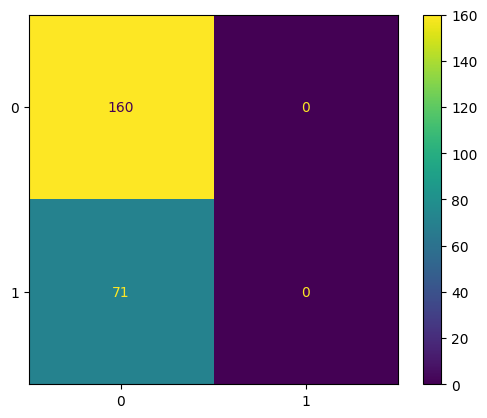

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)